<a href="https://colab.research.google.com/github/SwethaNandyala/DeepLearning/blob/main/ImageClassification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Dataset from Kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]


In [6]:
from zipfile import ZipFile
with ZipFile("/content/dogs-vs-cats.zip",'r')as zipobj:
  zipobj.extractall('/content/dogs-vs-cats')

# Load Dataset from directory

In [7]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#image_dataset_from_directory
#is  a generator it loads the dataset from the directory in the form of batches.
#each batch consists of images specified in the batch size

In [8]:
train_data_set = keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,seed=20,image_size=(150,150),validation_split=0.25,subset="both")

Found 20000 files belonging to 2 classes.
Using 15000 files for training.
Using 5000 files for validation.


In [9]:
test_data_set = keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=64,seed=20,image_size=(150,150))

Found 5000 files belonging to 2 classes.


# Normalise the data

In [10]:
#Normalization
def preprocessing_imgs(img, label):
    image = tf.cast(img/255.,tf.float32)
    return img, label

In [11]:
train_ds=train_data_set[0].map(preprocessing_imgs)
valid_ds=train_data_set[1].map(preprocessing_imgs)

In [12]:
test_ds = test_data_set.map(preprocessing_imgs)

# Create a CNN Model


In [70]:
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [54]:
from keras.backend import dropout
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(150,150,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
cnn_model.add(Dropout(0.1))

cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(150,150,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
cnn_model.add(Dropout(0.1))

cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(150,150,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
cnn_model.add(Dense(units=64,activation='relu',kernel_initializer='he_uniform'))
cnn_model.add(Dense(units=32,activation='relu',kernel_initializer='he_uniform'))
cnn_model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

cnn_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 37, 37, 64)       

In [55]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model_history = cnn_model.fit(train_ds,epochs=30,validation_data=valid_ds)

Epoch 1/30
235/235 [==============================] - 58s 232ms/step - loss: 17.0024 - accuracy: 0.5082 - val_loss: 0.6933 - val_accuracy: 0.4978
Epoch 2/30
235/235 [==============================] - 59s 249ms/step - loss: 0.7004 - accuracy: 0.5291 - val_loss: 0.6911 - val_accuracy: 0.4966
Epoch 3/30
235/235 [==============================] - 54s 229ms/step - loss: 0.6930 - accuracy: 0.5343 - val_loss: 0.6911 - val_accuracy: 0.4958
Epoch 4/30
235/235 [==============================] - 55s 231ms/step - loss: 0.6842 - accuracy: 0.5465 - val_loss: 0.6886 - val_accuracy: 0.5080
Epoch 5/30
235/235 [==============================] - 53s 224ms/step - loss: 0.6741 - accuracy: 0.5612 - val_loss: 0.6865 - val_accuracy: 0.5548
Epoch 6/30
235/235 [==============================] - 53s 224ms/step - loss: 0.6630 - accuracy: 0.5787 - val_loss: 0.6829 - val_accuracy: 0.5742
Epoch 7/30
235/235 [==============================] - 54s 229ms/step - loss: 0.6491 - accuracy: 0.5977 - val_loss: 0.6949 - val_a

In [57]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

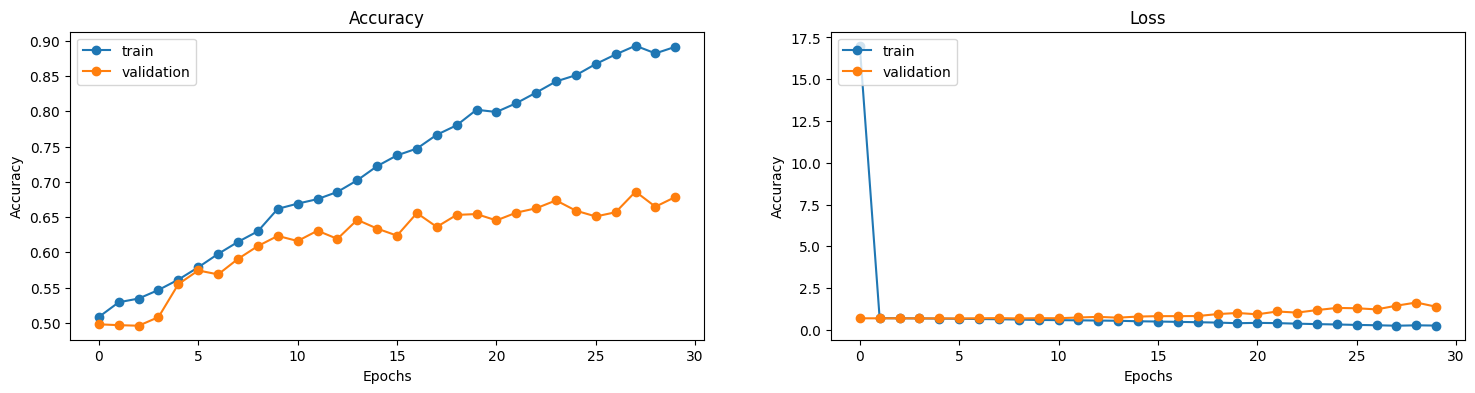

In [66]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.plot(model_history.history["accuracy"],'o-')

plt.plot(model_history.history["val_accuracy"],'o-')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(model_history.history["loss"],'o-')
plt.plot(model_history.history["val_loss"],'o-')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Loss")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [62]:
y_pred=cnn_model.predict(test_ds)

79/79 [==============================] - 8s 95ms/step


In [63]:
y_pred = (y_pred > 0.5)
y_pred.astype(int)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [64]:
 cnn_model.evaluate(train_ds)

235/235 [==============================] - 22s 93ms/step - loss: 0.1628 - accuracy: 0.9357


[0.16283005475997925, 0.9356666803359985]

In [65]:
 cnn_model.evaluate(test_ds)

79/79 [==============================] - 6s 64ms/step - loss: 1.3803 - accuracy: 0.6686


[1.3802900314331055, 0.6686000227928162]

In [67]:
cnn_model.save('dog_vs_cats.h5')

In [71]:
model = load_model("dog_vs_cats.h5")

In [72]:
model.predict(test_ds)

79/79 [==============================] - 8s 85ms/step


array([[0.7651834 ],
       [0.04839155],
       [0.9712225 ],
       ...,
       [0.06280303],
       [0.29398337],
       [0.1259704 ]], dtype=float32)

In [73]:
model.evaluate(test_ds)

79/79 [==============================] - 6s 68ms/step - loss: 1.3803 - accuracy: 0.6686


[1.3802900314331055, 0.6686000227928162]